In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('insurance_data.zip', compression='zip')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.value_counts("sex")

sex
male      675
female    662
Name: count, dtype: int64

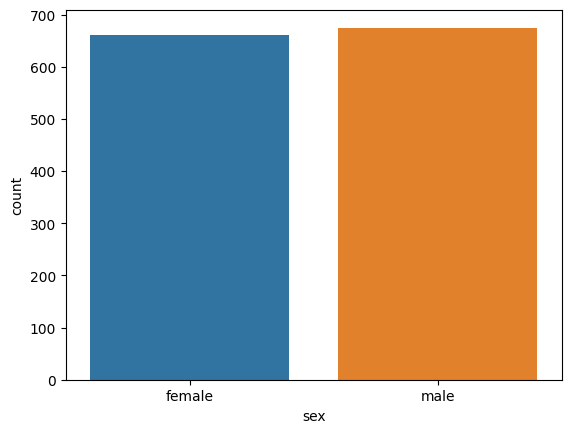

In [12]:
sns.countplot(data = df, x = "sex", hue = "sex")
plt.show()

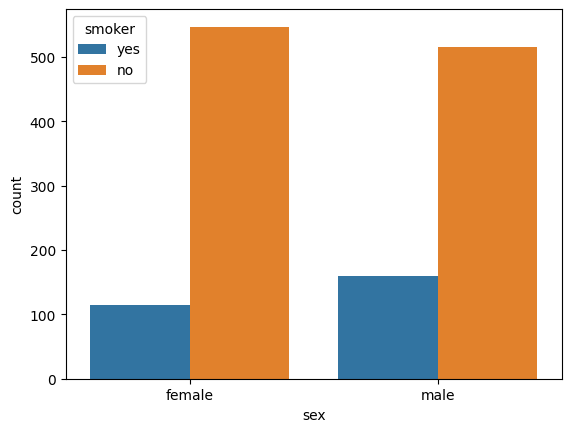

In [13]:
sns.countplot(data = df, x = "sex", hue = "smoker", )
plt.show()

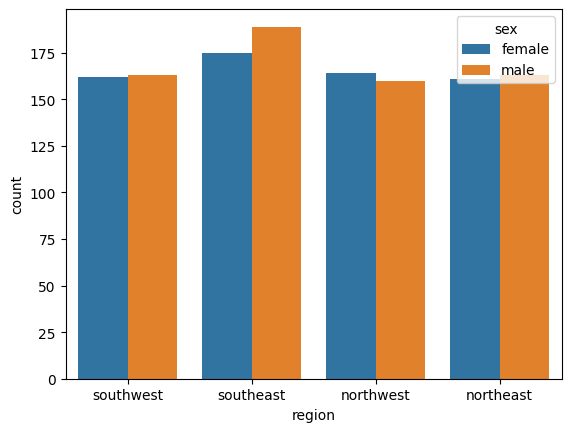

In [14]:
sns.countplot(data = df, x = "region", hue = "sex")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
labelencoder = LabelEncoder()

df["smoker"] = labelencoder.fit_transform(df["smoker"])
df["sex"] = labelencoder.fit_transform(df["sex"])
df["region"] = labelencoder.fit_transform(df["region"])

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
df.corr()["charges"].sort_values(ascending = False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

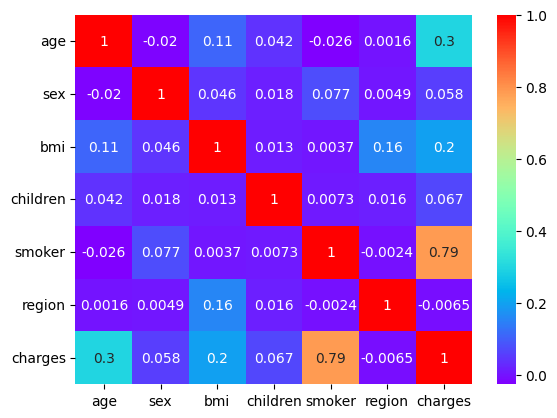

In [19]:
sns.heatmap(df.corr(), annot = True, cmap = "rainbow")
plt.show()

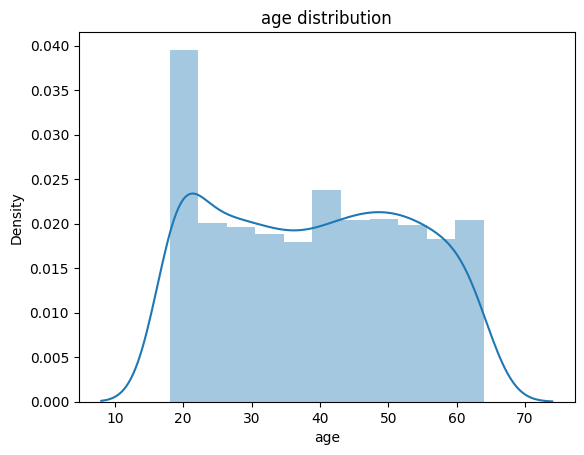

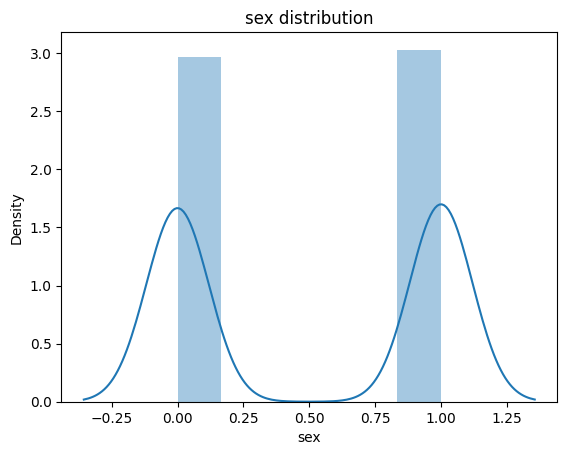

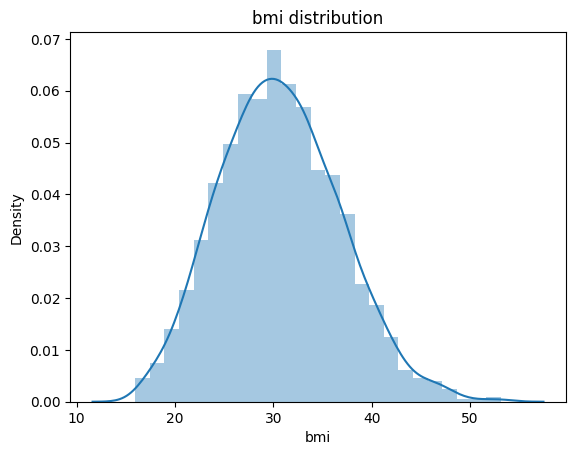

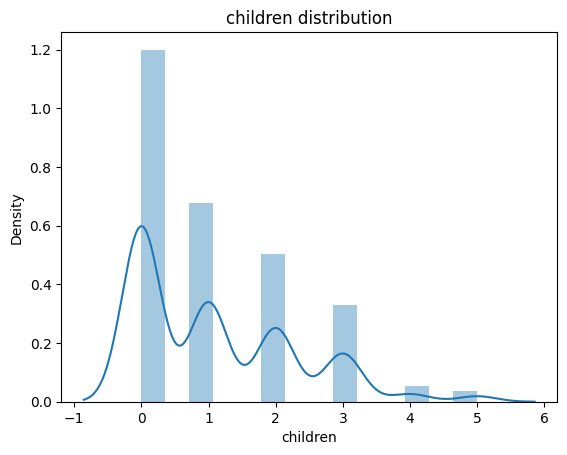

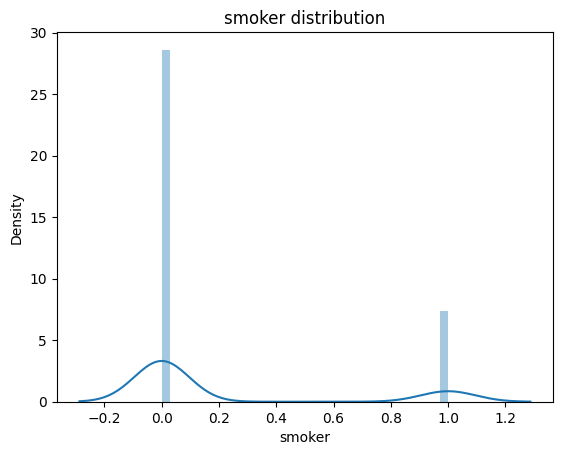

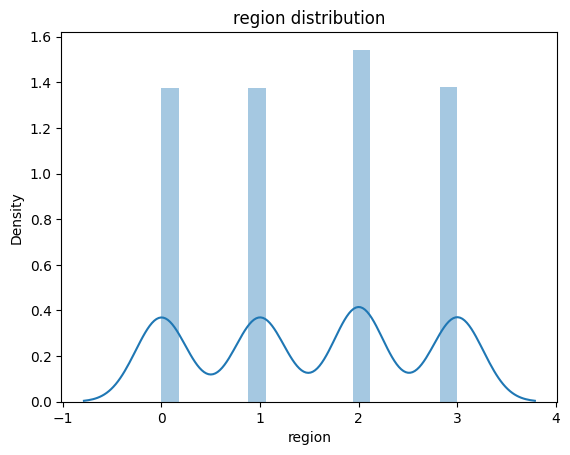

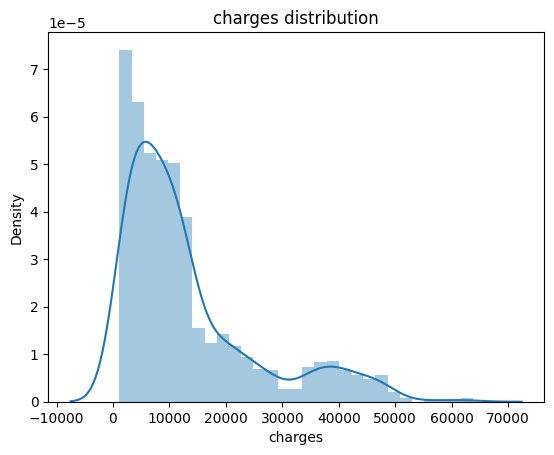

In [20]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i+ " distribution")
    plt.show()

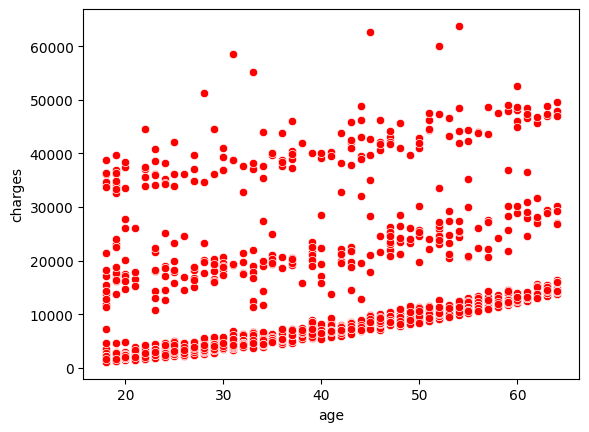

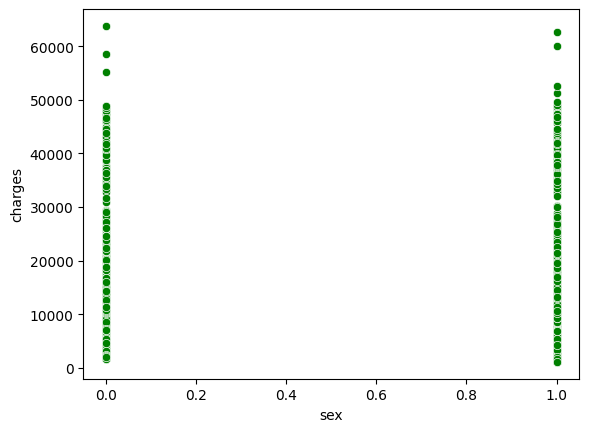

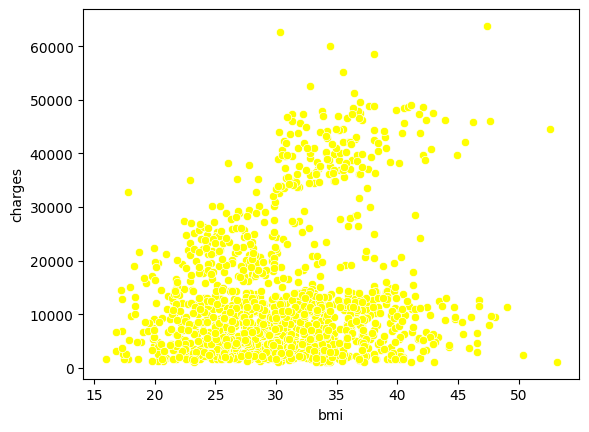

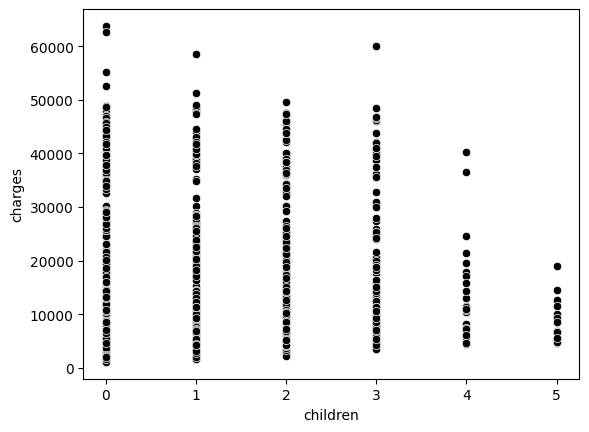

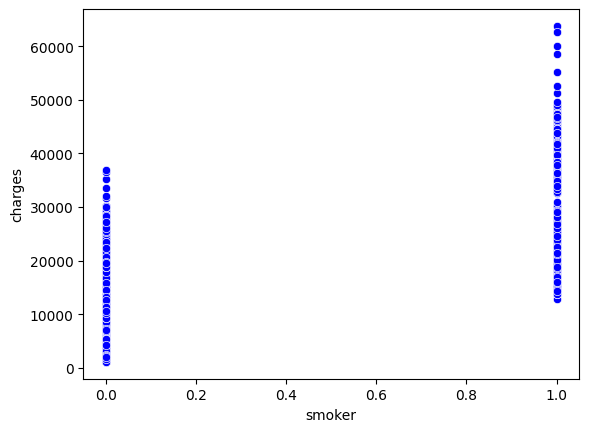

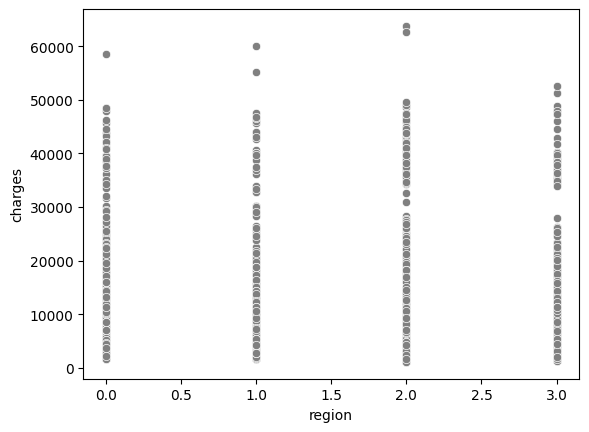

In [21]:
colorsforx = ["Red", "Green", "Yellow", "Black", "Blue", "Grey"]
colorchanger = 0

for i in df.columns[:-1]:
    sns.scatterplot(data = df, x = i, y = "charges", color = colorsforx[colorchanger])
    plt.show()
    colorchanger += 1

In [22]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((935, 6), (402, 6), (935,), (402,))

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_results(predictions):
    print("MAE = {}".format(mean_absolute_error(y_test, predictions)))
    print("MSE = {}".format(mean_squared_error(y_test, predictions)))

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(scaled_X_train, y_train)

LinearRegression()

In [27]:
predslr = lr.predict(scaled_X_test)
model_results(predictions=predslr)

MAE = 3995.758019609292
MSE = 35113201.12928976


In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_model = SVR()
param_grid_svr = {"C" : [0.001,0.01,0.1,0.5,1.0], 
                  "kernel" : ["linear", "rbf", "poly"],
                  "gamma" : ["scale", "auto"],
                  "degree" : [2,3,4,5]
                 }

gridsvr = GridSearchCV(svr_model, param_grid = param_grid_svr)
gridsvr.fit(scaled_X_train, y_train)

print("Best parameters for model = {}".format(gridsvr.best_params_))

Best parameters for model = {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [29]:
predsgridsvr = gridsvr.predict(scaled_X_test)
model_results(predsgridsvr)

MAE = 7496.9041550831325
MSE = 139131678.24202058


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()

param_grid_rfr = {'bootstrap' : [True],
                 'max_depth' : [5,10,15],
                 'max_features' : ['auto', 'log2'],
                 'n_estimators' : [2,3,4,5,6,7,8,9,10]
                 }

grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)

grid_rfr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [31]:
predsgridrfr = grid_rfr.predict(scaled_X_test)
model_results(predsgridrfr)

MAE = 2949.0884764711304
MSE = 25965154.849376556


In [33]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [37]:
columniterate = 1
for index in X.columns:
    mean = df[index].mean()
    print("The mean of the column {} is {}".format(columniterate, mean))
    columniterate +=1

The mean of the column 1 is 39.222139117427076
The mean of the column 2 is 0.5048616305160808
The mean of the column 3 is 30.66345175766642
The mean of the column 4 is 1.0957367240089753
The mean of the column 5 is 0.2049364248317128
The mean of the column 6 is 1.5160807778608825


In [38]:
newcustomer = np.array([39,0,30,1,0,1])

In [40]:
grid_rfr.predict(newcustomer.reshape(1,-1))

array([13884.58783567])

In [44]:
print("The Insurance cost of new Customer is {}".format(grid_rfr.predict(newcustomer.reshape(1,-1))[0]))

The Insurance cost of new Customer is 13884.587835666669
